Install the required libraries, such as TensorFlow and Keras

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import cv2

MODEL B: CNN Classifier

In [2]:
from keras.datasets import mnist
(X_train_CNN, y_train_CNN), (X_test_CNN, y_test_CNN) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Preprocess the data by reshaping the image arrays, expanding the dimensions and normalizing the pixel values:

In [3]:
X_train_CNN = X_train_CNN.reshape(60000, 28, 28, 1) / 255.0
X_test_CNN = X_test_CNN.reshape(10000, 28, 28, 1) / 255.0

One-hot encode the target labels:

In [4]:
from keras.utils import to_categorical
y_train_CNN = to_categorical(y_train_CNN, 10)
y_test_CNN = to_categorical(y_test_CNN, 10)

print("Training data shape: ", X_train_CNN.shape)
print("Training labels shape: ", y_train_CNN.shape)
print("Test data shape: ", X_test_CNN.shape)
print("Test labels shape: ", y_test_CNN.shape)

Training data shape:  (60000, 28, 28, 1)
Training labels shape:  (60000, 10)
Test data shape:  (10000, 28, 28, 1)
Test labels shape:  (10000, 10)


Define the model architecture using a sequential model and Conv2D and MaxPooling2D layers:

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model_CNN = Sequential()
model_CNN.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_CNN.add(MaxPooling2D(pool_size=(2, 2)))
model_CNN.add(Flatten())
model_CNN.add(Dense(128, activation='relu'))
model_CNN.add(Dense(10, activation='softmax'))
model_CNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

Compile the model with a suitable loss function, optimizer, and metrics:

In [6]:
model_CNN.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

Train the model using the fit method:

In [7]:
history = model_CNN.fit(X_train_CNN, y_train_CNN, batch_size=128, epochs=10,
                        validation_data=(X_test_CNN, y_test_CNN))

Epoch 1/10
469/469 [==============================] - 104s 218ms/step - loss: 0.2218 - accuracy: 0.9364 - val_loss: 0.0772 - val_accuracy: 0.9757
Epoch 2/10
469/469 [==============================] - 59s 125ms/step - loss: 0.0692 - accuracy: 0.9799 - val_loss: 0.0570 - val_accuracy: 0.9817
Epoch 3/10
469/469 [==============================] - 85s 181ms/step - loss: 0.0474 - accuracy: 0.9860 - val_loss: 0.0517 - val_accuracy: 0.9828
Epoch 4/10
469/469 [==============================] - 72s 154ms/step - loss: 0.0357 - accuracy: 0.9893 - val_loss: 0.0438 - val_accuracy: 0.9853
Epoch 5/10
469/469 [==============================] - 73s 155ms/step - loss: 0.0284 - accuracy: 0.9912 - val_loss: 0.0460 - val_accuracy: 0.9841
Epoch 6/10
469/469 [==============================] - 104s 223ms/step - loss: 0.0206 - accuracy: 0.9942 - val_loss: 0.0503 - val_accuracy: 0.9833
Epoch 7/10
469/469 [==============================] - 77s 164ms/step - loss: 0.0178 - accuracy: 0.9944 - val_loss: 0.0449 - val_

Evaluate the model on the test data:

In [8]:
train_loss_CNN, train_accuracy_CNN = model_CNN.evaluate(X_train_CNN, y_train_CNN)
test_loss_CNN, test_accuracy_CNN = model_CNN.evaluate(X_test_CNN, y_test_CNN)
print('Train Loss:', train_loss_CNN)
print('Train Accuracy:', train_accuracy_CNN)
print('Test Loss:', test_loss_CNN)
print('Test Accuracy:', test_accuracy_CNN)

313/313 [==============================] - 4s 12ms/step - loss: 0.0527 - accuracy: 0.9839
Train Loss: 0.00830579362809658
Train Accuracy: 0.9973499774932861
Test Loss: 0.05272360146045685
Test Accuracy: 0.9839000105857849


Graph Plotting to show performance of CNN models 

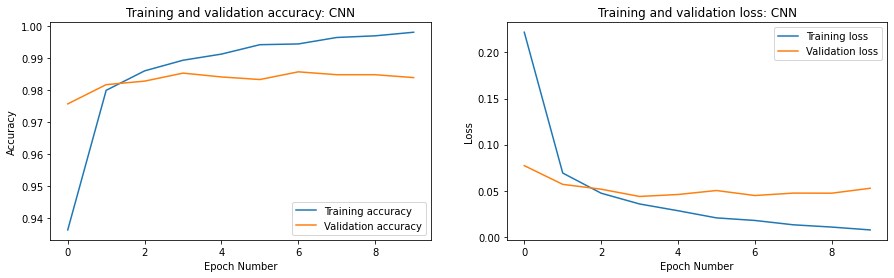

In [9]:
fig = plt.figure(figsize=(15,4))

fig.add_subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training accuracy', 'Validation accuracy'])
plt.title('Training and validation accuracy: CNN')
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')

fig.add_subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training loss', 'Validation loss'])
plt.title('Training and validation loss: CNN')
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.show()

Confusion Matrix for CNN

In [10]:
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

In [11]:
# Get predictions
y_predict_CNN = model_CNN.predict(X_test_CNN)
y_predict_CNN = np.argmax(y_predict_CNN, axis=1)

# Extract true class labels from one-hot encoded array
y_true_CNN = np.argmax(y_test_CNN, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_true_CNN, y_predict_CNN)

313/313 [==============================] - 6s 19ms/step


In [43]:
# Calculate accuracy
accuracy = np.trace(cm) / float(np.sum(cm))

# Calculate precision
precision = precision_score(y_true_CNN, y_predict_CNN, average='macro')

# Calculate recall
recall = recall_score(y_true_CNN, y_predict_CNN, average='macro')

Print Performance Parameters

In [44]:
print("Accuracy: {:.4f}%".format(accuracy * 100))
print("Precision: {:.4f}%".format(precision * 100))
print("Recall: {:.4f}%".format(recall * 100))

Accuracy: 98.3900%
Precision: 98.3760%
Recall: 98.3825%


Visualisation of confusion matrix

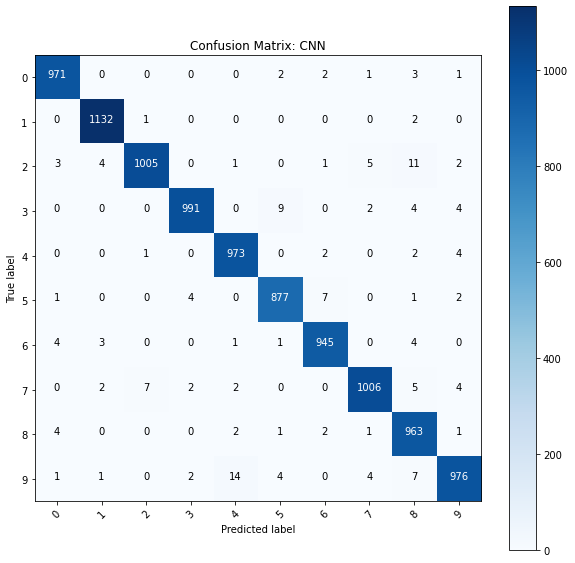

In [18]:
# Plot the confusion matrix
plt.figure(figsize=(10, 10))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, [str(i) for i in range(10)], rotation=45)
plt.yticks(tick_marks, [str(i) for i in range(10)])
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix: CNN')
plt.show()